In [1]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.mixture import GaussianMixture

In [2]:
train = pd.read_csv('R:/IISc/Sem 2/PRNN/Assignments/assignment-1-data-sets/P3a_train_data.csv', header=None)

In [3]:
D = 1

In [4]:
train = train.rename(columns={D: "y"})
train

,0,y
0,2.45497,1
1,2.97240,1
2,3.35191,1
3,2.60095,1
4,1.97615,1
...,...,...
195,10.66159,-1
196,8.56088,-1
197,13.61581,-1
198,6.67598,-1


EM ALGORITHM ESTIMATE

In [5]:
x0 = train[train['y'] == -1]
x1 = train[train['y'] == 1]

In [6]:
X0 = x0.iloc[:, :D]
X0 = np.array(X0)
X1 = x1.iloc[:, :D]
X1 = np.array(X1)

In [7]:
gm0 = GaussianMixture(n_components=2, max_iter=200, random_state=0).fit(X0)
gm1 = GaussianMixture(n_components=2, max_iter=100, random_state=0).fit(X1)

In [8]:
gm0.weights_

array([0.52370238, 0.47629762])

In [9]:
gm0.means_

array([[11.51186173],
       [ 7.56733472]])

In [10]:
gm0.covariances_

array([[[2.92639719]],

       [[3.29172029]]])

In [11]:
gm1.weights_

array([0.5594664, 0.4405336])

In [12]:
gm1.means_

array([[3.82633866],
       [0.35767709]])

In [13]:
gm1.covariances_

array([[[5.09926508]],

       [[5.7776568 ]]])

In [14]:
total = len(train.index)

p01 = gm0.weights_[0]
p02 = gm0.weights_[1]
mu01 = gm0.means_[0][0]
mu02 = gm0.means_[1][0]
sigma01 = gm0.covariances_[0][0][0]
sigma02 = gm0.covariances_[1][0][0]

p11 = gm1.weights_[0]
p12 = gm1.weights_[1]
mu11 = gm1.means_[0][0]
mu12 = gm1.means_[1][0]
sigma11 = gm1.covariances_[0][0][0]
sigma12 = gm1.covariances_[1][0][0]

In [15]:
def gaussian_prob(x, p1, mu1, sigma1, p2, mu2, sigma2):
    value = p1 * stats.norm(mu1, sigma1).pdf(x) + p2 * stats.norm(mu2, sigma2).pdf(x)
    return value

def prediction(posterior_0, posterior_1):
    if posterior_0 > posterior_1:
        return -1
    else:
        return 1

In [16]:
train['posterior_0'] = train.apply(lambda row: gaussian_prob(np.array(row[0]), p01, mu01, sigma01, p02, mu02, sigma02), axis=1)
train['posterior_1'] = train.apply(lambda row: gaussian_prob(np.array(row[0]), p11, mu11, sigma11, p12, mu12, sigma12), axis=1)
train['predicted'] = train.apply(lambda row: prediction(row.posterior_0, row.posterior_1), axis=1)

In [17]:
train.head()

,0,y,posterior_0,posterior_1,predicted
0,2.45497,1,0.017875,0.070694,1
1,2.97240,1,0.022800,0.070618,1
2,3.35191,1,0.026888,0.070177,1
3,2.60095,1,0.019188,0.070734,1
4,1.97615,1,0.013995,0.070230,1


In [18]:
y = train.iloc[:, [D]]
y_pred = train.iloc[:, [-1]]

In [19]:
predictions_train = np.array(y_pred) == np.array(y)

In [20]:
true_count = (predictions_train[:, 0] == True).sum()
false_count = (predictions_train[:, 0] == False).sum()
accuracy = true_count/(total) * 100
print(true_count, false_count)
print('Accuracy = ' + str(accuracy) + '%')

180 20
Accuracy = 90.0%


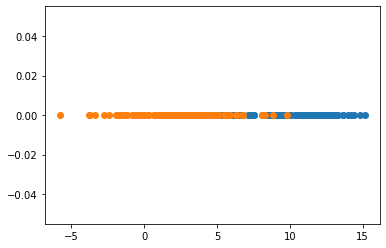

In [21]:
x0 = train[train['y'] == -1][0]
y = list([0]*len(list(x0)))
x1 = train[train['y'] == 1][0]
plt.scatter(x0, y)
plt.scatter(x1, y)

In [23]:
test = pd.read_csv('R:/IISc/Sem 2/PRNN/Assignments/assignment-1-data-sets/P3a_test_data.csv', header=None)

In [24]:
test = test.rename(columns={D: "y"})
test.head()

,0,y
0,2.36515,1
1,6.25752,1
2,4.33258,1
3,-1.96716,1
4,4.47927,1


In [25]:
test['posterior_0'] = test.apply(lambda row: gaussian_prob(np.array(row[0]), p01, mu01, sigma01, p02, mu02, sigma02), axis=1)
test['posterior_1'] = test.apply(lambda row: gaussian_prob(np.array(row[0]), p11, mu11, sigma11, p12, mu12, sigma12), axis=1)
test['predicted'] = test.apply(lambda row: prediction(row.posterior_0, row.posterior_1), axis=1)

In [26]:
total = len(test.index)
y = test.iloc[:, [D]]
y_pred = test.iloc[:, [-1]]

In [27]:
predictions_test = np.array(y_pred) == np.array(y)

In [28]:
true_count = (predictions_test[:, 0] == True).sum()
false_count = (predictions_test[:, 0] == False).sum()
accuracy = true_count/(total) * 100
print(true_count, false_count)
print('Accuracy = ' + str(accuracy) + '%')

187 13
Accuracy = 93.5%


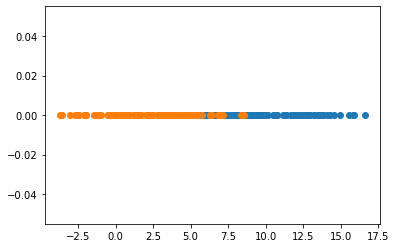

In [29]:
x0 = test[test['y'] == -1][0]
y = list([0]*len(list(x0)))
x1 = test[test['y'] == 1][0]
plt.scatter(x0, y)
plt.scatter(x1, y)

MAXIMUM LIKELIHOOD ESTIMATE

In [35]:
train = pd.read_csv('R:/IISc/Sem 2/PRNN/Assignments/assignment-1-data-sets/P3b_train_data.csv', header=None)

In [36]:
D = 1

In [37]:
train = train.rename(columns={D: "y"})
train.head(5)

,0,y
0,1.54474,1
1,1.26571,1
2,1.64868,1
3,7.07286,1
4,6.38864,1


In [38]:
total = len(train.index)
p0 = train[train.y == -1].shape[0]/total
p1 = train[train.y == 1].shape[0]/total
print(total, p0, p1)

200 0.5 0.5


In [39]:
mu0 = train.groupby('y').mean().loc[-1][0]
mu1 = train.groupby('y').mean().loc[1][0]
sigma0 = np.array(train.groupby('y').cov().loc[-1])[0][0]
sigma1 = np.array(train.groupby('y').cov().loc[1])[0][0]
print(mu0)
print(mu1)
print(sigma0)
print(sigma1)

8.769839999999999
4.4707577999999994
21.359141053763643
17.577411287924406


In [83]:
def gaussian_prob(x, p, mu, sigma):
    value = p * stats.norm(mu, sigma).pdf(x)
    return value

def prediction(posterior_0, posterior_1):
    if posterior_0 > posterior_1:
        return -1
    else:
        return 1

In [84]:
train['posterior_0'] = train.apply(lambda row: gaussian_prob(np.array(row[0]), p0, mu0, sigma0), axis=1)
train['posterior_1'] = train.apply(lambda row: gaussian_prob(np.array(row[0]), p1, mu1, sigma1), axis=1)
train['predicted'] = train.apply(lambda row: prediction(row.posterior_0, row.posterior_1), axis=1)

In [85]:
train.head()

,0,y,posterior_0,posterior_1,predicted
0,2.45497,1,0.016849,0.023608,1
1,2.97240,1,0.018107,0.023537,1
2,3.35191,1,0.019024,0.023429,1
3,2.60095,1,0.017204,0.023597,1
4,1.97615,1,0.015688,0.023595,1


In [86]:
y = train.iloc[:, [D]]
y_pred = train.iloc[:, [-1]]

In [87]:
predictions_train = np.array(y_pred) == np.array(y)

In [88]:
true_count = (predictions_train[:, 0] == True).sum()
false_count = (predictions_train[:, 0] == False).sum()
accuracy = true_count/(total) * 100
print(true_count, false_count)
print('Accuracy = ' + str(accuracy) + '%')

181 19
Accuracy = 90.5%


In [89]:
test = pd.read_csv('R:/IISc/Sem 2/PRNN/Assignments/assignment-1-data-sets/P3a_test_data.csv', header=None)

In [90]:
test = test.rename(columns={D: "y"})
test.head()

,0,y
0,2.36515,1
1,6.25752,1
2,4.33258,1
3,-1.96716,1
4,4.47927,1


In [91]:
test['posterior_0'] = test.apply(lambda row: gaussian_prob(np.array(row[0]), p0, mu0, sigma0), axis=1)
# test['posterior_0'] = test.apply(lambda row: p0 * exponential_prob(np.array(row[0:D]), mu0, D), axis=1)
test['posterior_1'] = test.apply(lambda row: gaussian_prob(np.array(row[0]), p1, mu1, sigma1), axis=1)
test['predicted'] = test.apply(lambda row: prediction(row.posterior_0, row.posterior_1), axis=1)

In [92]:
total = len(test.index)
y = test.iloc[:, [D]]
y_pred = test.iloc[:, [-1]]

In [93]:
predictions_test = np.array(y_pred) == np.array(y)

In [94]:
true_count = (predictions_test[:, 0] == True).sum()
false_count = (predictions_test[:, 0] == False).sum()
accuracy = true_count/(total) * 100
print(true_count, false_count)
print('Accuracy = ' + str(accuracy) + '%')

182 18
Accuracy = 91.0%


NEAREST NEIGHBOUR CLASSIFIER

In [95]:
from scipy.spatial.distance import cdist

In [96]:
def closest_point(point, points):
    """ Find closest point from a list of points. """
    return points[cdist([point], points).argmin()]

def match_value(df, col1, x, col2):
    """ Match value x from col1 row to value in col2. """
    return df[df[col1] == x][col2].values[0]

In [97]:
train['feature'] = train.iloc[:, 0:D].apply(tuple, axis=1)

In [98]:
test['feature'] = test.iloc[:, 0:D].apply(tuple, axis=1)

In [99]:
test['closest'] = [closest_point(x, list(train['feature'])) for x in test['feature']]
test['predicted_nn'] = [match_value(train, 'feature', x, 'y') for x in test['closest']]

In [100]:
y_nn_pred = test.iloc[:, [-1]]

In [101]:
predictions_nn_test = np.array(y_nn_pred) == np.array(y)

In [102]:
true_count = (predictions_nn_test[:, 0] == True).sum()
false_count = (predictions_nn_test[:, 0] == False).sum()
accuracy = true_count/(total) * 100
print(true_count, false_count)
print('Accuracy = ' + str(accuracy) + '%')

179 21
Accuracy = 89.5%
